# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

 1. Do the users spend more time on the new landing page than on the existing landing page?

 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

 3. Does the converted status depend on the preferred language? 

 4. Is the time spent on the new page the same for the different language users?


### Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.
1. user_id - Unique user ID of the person visiting the website
2. group - Whether the user belongs to the first group (control) or the second group (treatment)
3. landing_page - Whether the landing page is new or old
4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
5. converted - Whether the user gets converted to a subscriber of the news portal or not
6. language_preferred - Language chosen by the user to view the landing page


## Import all the necessary libraries

In [227]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#impoert libraries for statistics 
import scipy.stats as stats


## Reading the Data into a DataFrame

In [287]:
# reading data from the file
df = pd.read_csv("C:/Phython/abtest.csv")

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [288]:
#First 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


Observation:

The dataframe has 6 columns and each row represents usage statistics for individual user-ids for the e-news website.

In [289]:
# last 5 rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [290]:
#Shape of Dataframe
df.shape

(100, 6)

Observation: 

The shape of Dataframe is (100, 6) with 100 rows and 6 columns.

In [293]:
#Summary of Dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


Observations:

1. The data has 2 'numerical' columns with each  type (float) and type (int).
2. The data has 4 objects which means the presence of 4 'categorical' columns.
3. The data has 6 distinct columns  with each having 100 'non-null' values, and no data is missing from any columns.



In [294]:
# Statistical summary of Dataframe
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


Observation:
    
1. One of numerical column is user-id column represented by unique number for each user.
2. The 2nd numerical column contains information about time spend by the users on the e-news portal website.
3. The min time spend is .19 mins and maximum time spent on website is 10.71 mins
4. Atleast 25% users spent more than 7.022 mins on website 
5. The mean time spent is 5.377 mins and is close to median time of 5.42 mins. 

In [295]:
# Statistical summary of Dataframe
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


Observation:

1. There are 4 categorical columns in this dataframe
2. The categorical column of 'group' has 2 unique values.
3. The categorical column of 'landing_page' has 2 unique values.
4. The categorical column 'converted' has more number of 'yes' which means more number of users was converted to a subscriber of the news portal from the given sample.
5. The categorical column of 'language_preferred' has 3 unique values.
6. More users preferred the Spanish language portal over other languages.
7. These statistics suggest the 'control group' appears more often in the dataset.


In [296]:
#if dataframe as any null value
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

Observation:

There is no missing data in this dataframe for any column


In [297]:
# if dataframe has any duplicate values
df.duplicated().sum()
print('Total number of duplicate values are:', df.duplicated().sum())

df.duplicated().value_counts()

Total number of duplicate values are: 0


False    100
dtype: int64

In [298]:
#number of unique customer
df['user_id'].nunique()

100

In [299]:
# Two Unique group
df['group'].unique()

print('The two group used in study are:\n', df['group'].unique())

The two group used in study are:
 ['control' 'treatment']


In [300]:
# Two Unique landing page
df['landing_page'].unique()

print('The two landing page compared in study are:\n', df['landing_page'].unique())

The two landing page compared in study are:
 ['old' 'new']


In [301]:
#Converted to subscriber
df['converted'].unique()

array(['no', 'yes'], dtype=object)

In [302]:
# Three unique langugues 
df['language_preferred'].unique()

print('Three preferred languague of users are:\n', df['language_preferred'].unique())

Three preferred languague of users are:
 ['Spanish' 'English' 'French']


Observation:

1. The data has 100 unique ids and there is no duplicate data in this dataset.
2. The two groups in the data are control and treatment groups.
3. The 2 unique values of 'landing_page' are old landing page and new landing page.
4. The 3 languages are preferred by users to view landing page are Spanish, English and French.

### Univariate Analysis



### Group
------------------------------------------------------------------------------------------------------------------------------

In [303]:
#Value counts for the data
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

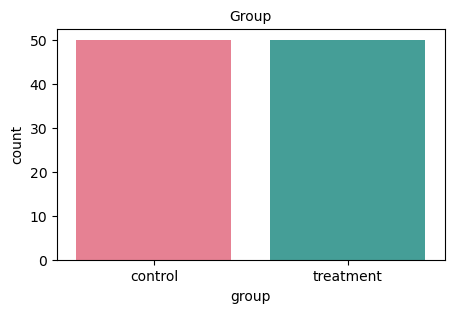

In [304]:
#Countplot for categorical value: 'group'
plt.figure(figsize = (5,3))     # to increase the figure size for graph

plt.title( "Group", loc = 'center', fontsize = 10) # Plot title on top of plot

# plot the countplot for distribution 
sns.countplot(data = df, x = 'group', palette = 'husl') 

plt.xlabel('group');


Observation:
    
1. As described in objective 2 groups are selected for this study with 50 users in each group for both control and treatment group.
2. This univariate analysis of 'group' clearly shows that there are equal numbers of users in both control and treatment groups  unlike suggested by statistical summary.


### Landing Page
--------------------------------------------------------------------------------------------------------------

In [305]:
#Value counts for landing page
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

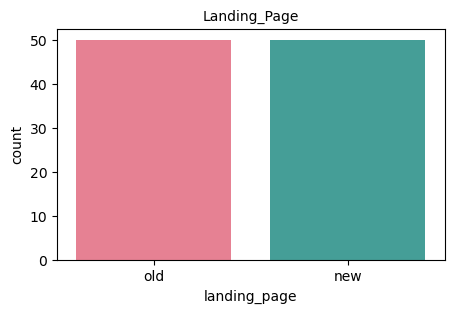

In [306]:
#Countplot for categorical value: 'landing Page'
plt.figure(figsize = (5,3))  
plt.title( "Landing_Page", loc = 'center', fontsize = 10) # Plot title on top of plot

# plot the countplot for distribution 
sns.countplot(data = df, x = 'landing_page', palette = 'husl') 
plt.xlabel('landing_page');


Observation: 

1. As described in the objective above, the old landing page was served to the control group and the new landing page to the treatment group.                                   
2. The value count of landing pages are 50 each, therefore all the users from both groups have landed on their respective pages.


### Time spend on the page
------------------------------------------------------------------------------------------------------------------------------

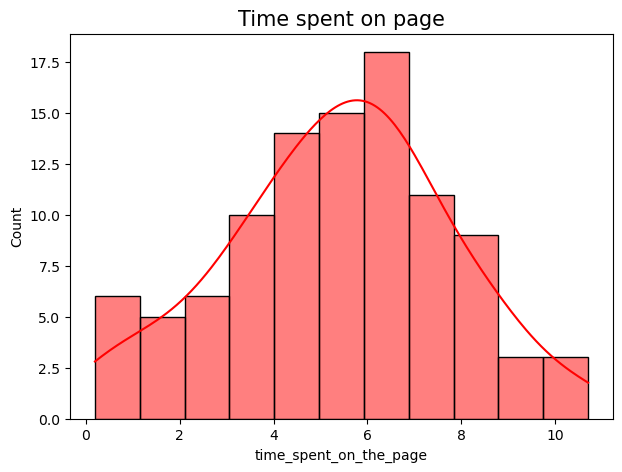

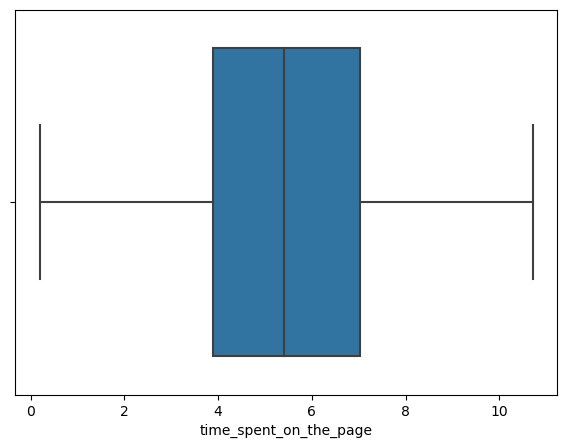

In [307]:
#Spent time: histogram and Boxplot
plt.figure(figsize= (7,5))
plt.title('Time spent on page', fontsize = 15) 

sns.histplot(data=df,x='time_spent_on_the_page', bins = 11,  kde= 'True', color = 'red')## Histogram for the time spent on news page
plt.xlabel('time_spent_on_the_page')
plt.show() #plt show will plot two graphs separately
 
plt.figure(figsize= (7,5))
sns.boxplot(data=df,x='time_spent_on_the_page') ## Boxplot for the time spent
plt.show() 



Observation:
    
1. The time spent on pages is normally distributed with a median at 5.42 mins. 
2. The min time spend is .19 mins and maximum time spent on website is 10.71 mins
3. There are no outlier in the data.
4. The maximum number of users at least 17, have spent around 6 mins on the webpage.
5. Very few users around 5 only have spent more than 9 mins on the webpage.

### Converted
------------------------------------------------------------------------------------------------------------------------


In [308]:
#Coverted to subscriber's unique values
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

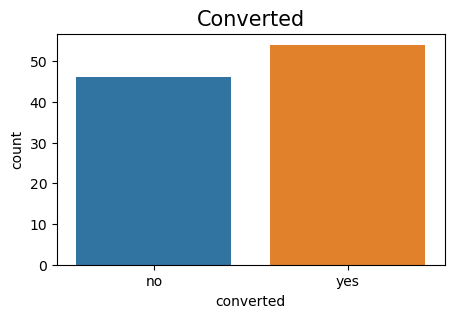

In [309]:
#Countplot for categorical value: 'Coverted'
plt.figure(figsize= (5,3))
plt.title ("Converted", loc = 'center', fontsize = 15) 
sns.countplot(data = df, x = 'converted')
plt.xlabel('converted');

Observation:
    
1. Total number of users that get converted to a subscriber of the news portal is 54.
2. The difference in users that converted to subscribers is only slightly higher (8 users)than non-subscriber. 
3. The combined conversion rate from users to subscribe is around 54% for the dataset.


In [310]:
# Value counts for preferred languages
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

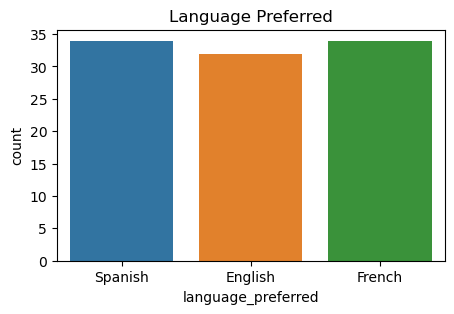

In [311]:
#Countplot for categorical value: 'Language Preferred '
plt.figure(figsize= (5,3))
plt.title ('Language Preferred', loc = 'center', fontsize = 12) 
sns.countplot(data = df, x = 'language_preferred')
plt.xlabel('language_preferred');

Observation:

1. The landing webpage in languages Spanish or French are visited a little more (34 times) than english (32 times).
2. This univariate analysis of 'languague_preferred' clearly shows that there are equal number visits for French and Spanish language landing pages unlike suggested by statistical summary.


### Bivariate Analysis

### Landing Page vs Time spent on page
---------------------------------------------------------------------------------------------------------------------------

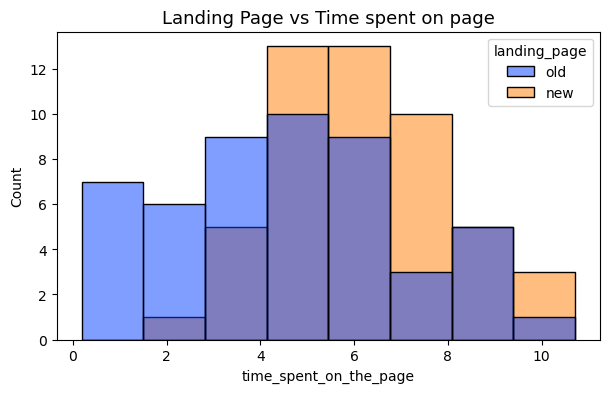

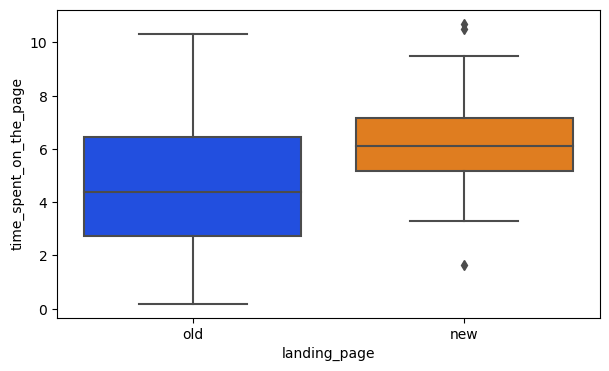

In [316]:
# Breaking the distribution of time wrt to landing page
plt.figure(figsize = (7,4))
plt.title('Landing Page vs Time spent on page', fontsize = 13)
sns.histplot(data=df, x= 'time_spent_on_the_page', hue = 'landing_page', palette = 'bright');
plt.show()
plt.figure(figsize= (7,4));
sns.boxplot(data=df,x='landing_page', y = 'time_spent_on_the_page', palette = 'bright');


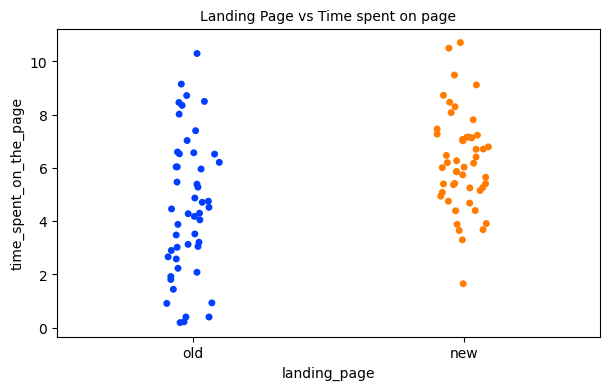

In [317]:
# Compare the stripplot 
plt.figure(figsize = (7,4))
plt.title('Landing Page vs Time spent on page', fontsize = 10)
sns.stripplot(data=df,x= "landing_page", y = 'time_spent_on_the_page', jitter = True, palette = 'bright')
plt.show()

Observation:
    
1. The histogram and stripplot clearly shows average users are spending higher time on the new page compared to the old landing page.
2. The time spent on a new page approximately lies between the range of 3 mins to 9 mins.
3. There are outliers on both sides for new landing page data.
4. More than 75% of users have spent at least 5 mins on a new webpage.
5. The median time spent on a new page is around 6.3 mins comparatively higher than 4.5 mins of the old page.
6. The distribution is widely spread from min time of .19 mins to maximum time of 10.2 mins for old landing pages.
.


### Conversion Rate vs Time spent on page
----------------------------------------------------------------------------------------------------------------------------

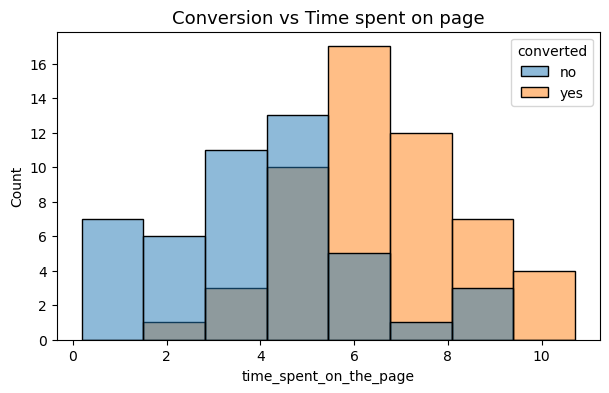

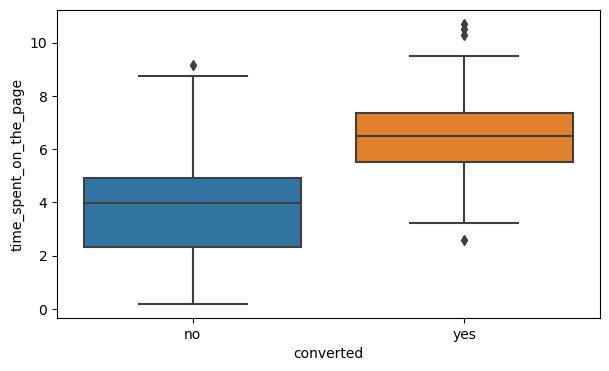

In [318]:
# Breaking the distribution of time wrt to landing page
plt.figure(figsize = (7,4))
plt.title('Conversion vs Time spent on page', fontsize = 13)
sns.histplot(data=df, x= 'time_spent_on_the_page', hue = 'converted');
plt.show()
plt.figure(figsize= (7,4));
sns.boxplot(data=df,x='converted', y = 'time_spent_on_the_page');


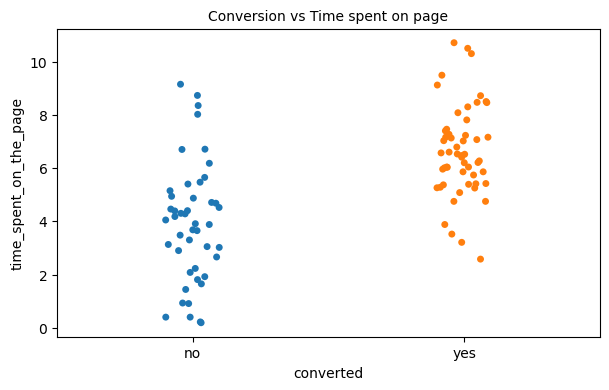

In [320]:
# Compare the stripplot 
plt.figure(figsize = (7,4))
plt.title('Conversion vs Time spent on page', fontsize = 10)
sns.stripplot(data=df,x= "converted", y = 'time_spent_on_the_page', jitter = True);

Observation:
    
1. The histogram and stripplot clearly shows higher time spent on page leads to higher conversion rate for subscription.
2. The average spending time of 5 mins to 8 mins on a webpage increases the chances of subscription from users.
3. There are outliers for both the distributions of the 'converted' data.
4. The minimum time a user has spent on a page is 2.5 mins before subscribing to it.
3. The median time spent on page is around 6.3 mins for converting into subscription as compared to 4 mins of non-subscribers.
4. The 'no' distribution data is rightly skewed.

Inference:

Higher time spent (atleast 5 mins ) on a page can increase the chances of subscription from the respective user. 


### Language Preferred vs Time spend on page
----------------------------------------------------------------------------------------------------------------------

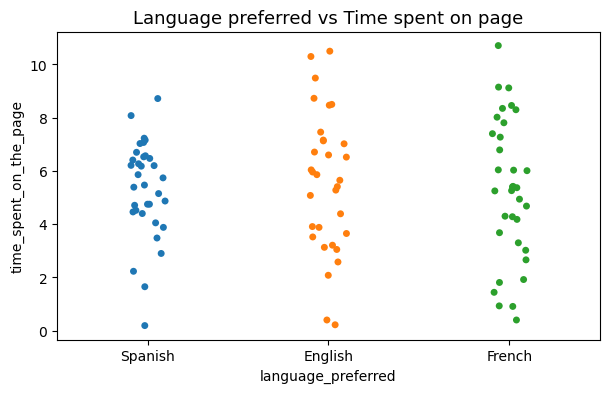

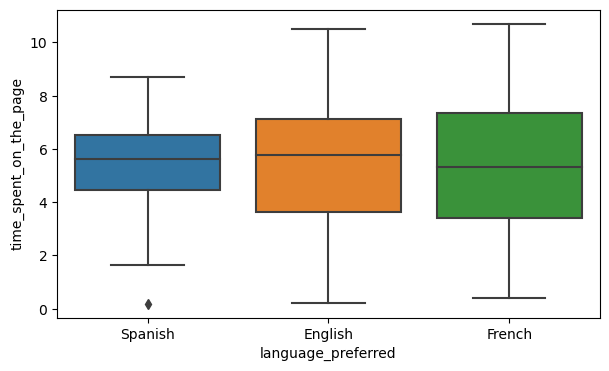

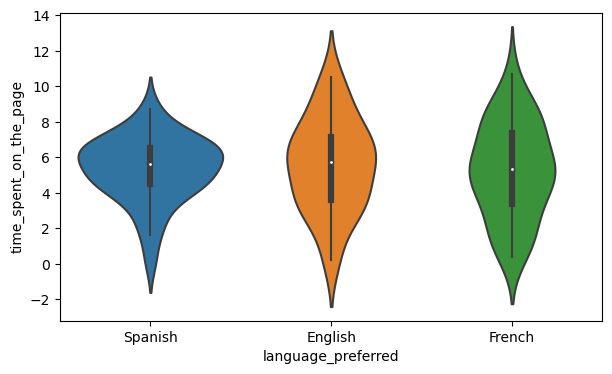

In [365]:
# Breaking the distribution of time wrt to landing page
plt.figure(figsize = (7,4))
plt.title('Language preferred vs Time spent on page', fontsize = 13)
sns.stripplot(data=df, x='language_preferred',y ='time_spent_on_the_page',jitter = True);
plt.show()

plt.figure(figsize= (7,4));
sns.boxplot(data=df,x='language_preferred', y = 'time_spent_on_the_page');
plt.show() #allowes muliple graphs to be plot without superimposing on each other

plt.figure(figsize= (7,4));
sns.violinplot(data=df,x='language_preferred', y = 'time_spent_on_the_page');

In [322]:
# Calculating min , max , mean time for different languagues

df.groupby('language_preferred').time_spent_on_the_page.min()

language_preferred
English    0.22
French     0.40
Spanish    0.19
Name: time_spent_on_the_page, dtype: float64

In [323]:
df.groupby('language_preferred').time_spent_on_the_page.max()

language_preferred
English    10.50
French     10.71
Spanish     8.72
Name: time_spent_on_the_page, dtype: float64

In [325]:
df.groupby('language_preferred').time_spent_on_the_page.mean()

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64

In [326]:
df.groupby('language_preferred').time_spent_on_the_page.median()

language_preferred
English    5.755
French     5.315
Spanish    5.605
Name: time_spent_on_the_page, dtype: float64

Observation:
    
1. The time spent on the french landing page is widely distributed from .4 mins to 10.71 mins.
2. The median and mean time spent on the French landing page are quite close 5.314 mins and 5.253 mins and data is normally distributed.
3. The time spent on the English landing page is widely distributed from .22 mins to 10.5 mins.
4. The median and mean time spent on an English page are 5.75 mins and 5.55 mins and data is slightly left skewed.
5. The time spent on the Spanish landing page is distributed from .19 mins to 8.72 mins.
6. The median and mean time spent on spanish pages are 5.605 mins and 5.331 mins and data is left skewed.
7. The violinplot clearly indicates high distribution density on the spanish page from 3.5 mins to 7.5 mins.

Inference:

Most users who prefer spanish pages usually stay on websites from 3.5 to 7.5 mins only and probably less interested in news portals or have low attention span as compared to english or french users.



## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

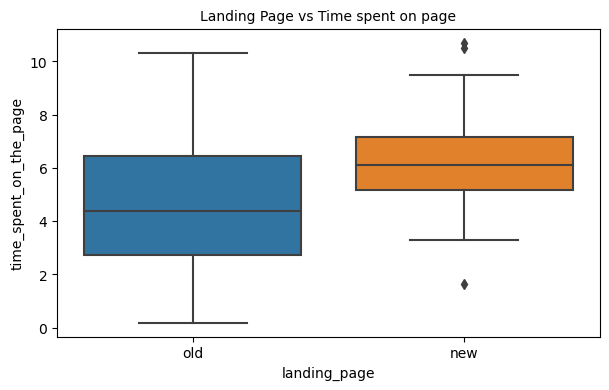

In [327]:
#Visualize time spent on new vs old landing page
plt.figure(figsize= (7,4));
plt.title('Landing Page vs Time spent on page', fontsize = 10)
sns.boxplot(data=df,x='landing_page', y = 'time_spent_on_the_page');
plt.show()

Observation:

1. The boxplot clearly shows average users are spending higher time on the new page compared to the old landing page.
2. The median time spent on a new page is around 6.3 mins comparatively higher than 4.5 mins of the old page.
3. Apart from outliers, the minimum time spent on a new page is around 3 mins, significantly higher than .19 mins for the old page. 
4. The time spent on a new page is more than 5 mins for atleast 75% of users whereas 50% of users have spent less than 4.2 mins on the old page.  
 
Inference:

We can infer the average time spent on the new page is higher than the old page, but is this difference statistically significant to conclude for the entire population?


### Step 1: Define the null and alternate hypotheses

Let  μ1, μ2  be the mean time spent on old and new page

𝜇1 = Mean time spent on old page 

𝜇2 = Mean time spent on new page 

Null Hypothesis:

$H_0$: 𝜇2 ≤ 𝜇1 

Alternate Hypothesis: 

$H_a$: 𝜇2 > 𝜇1


### Step 2: Select Appropriate test

In [328]:
# Statistics of Time spend on new page 
Time_new = df.loc[df['landing_page'] == 'new']['time_spent_on_the_page']

#means and sample standard deviations 
print('Mean time spend on new page :', round(Time_new.mean(), 2))
print('Standard Deviation for time spend on new page :', round(Time_new.std(), 2))


Mean time spend on new page : 6.22
Standard Deviation for time spend on new page : 1.82


In [330]:
# Statistics of Time spend on old page 
Time_old = df.loc[df['landing_page'] == 'old']['time_spent_on_the_page']

#means and sample standard deviations 
print('Mean time spend on old page :', round(Time_old.mean(), 2))
print('Standard Deviation for time spend on old page :', round(Time_old.std(), 2))


Mean time spend on old page : 4.53
Standard Deviation for time spend on old page : 2.58


#### Appropiate Test

This is a one-tailed test concerning two population means from two independent populations. 
The population standard deviations are unknown and standard deviation of sample is different.

#### Assumptions for T-test

1. Continuous: The time spent on a webpage is measured on a continuous scale.
2. Normally Distributed: Sample size for both pages is sufficiently large (≥30) therefore can be considered normally  
3. Independent populations:  As old and new pages are assigned to two different treatment and control groups, the two samples are from two independent populations.
4. Unequal Standard Deviation: The standard deviations for sample is different, the population standard deviations might be different too.
5. Random selection: Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups.

Therefore 2 Independent Sample T-test for Equality of Means and unequal standard deviation can be used.


### Step 3: Decide the significance level

As this one tail test, we select α = 0.05.

### Step 4: Collect and prepare data

In [332]:
#Dataset for time spend on new page as calculated above
Time_new = df.loc[df['landing_page'] == 'new']['time_spent_on_the_page']

#Dataset for Time spend on old page as calculated above
Time_old = df.loc[df['landing_page'] == 'old']['time_spent_on_the_page']


### Step 5: Calculate the p-value

In [333]:
#import the required functions to import function 'ttest_ind()'
from scipy.stats import ttest_ind

#Calculation of p-value
# find the p-value
test_stat, p_value = ttest_ind(Time_new, Time_old, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)
print('The test_stat is', test_stat)

The p-value is  0.0001392381225166549
The test_stat is 3.7867702694199856


### Step 6: Compare the p-value with $\alpha$

In [334]:
# print the conclusion based on p-value

if p_value < 0.05:
    print(f'As the {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')
    

As the 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

At a 5% significance level, we rejected the null hypothesis. Hence, we do have enough statistical evidence to say that the average time spent on new page is significantly higher than old page. 

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

In [336]:
# pandas crosstab() function is used to create a contingency table between two categorical variables
#Contingency Table of "landing_page" and "converted"

pd.crosstab(df['landing_page'], df['converted'], margins = True)

converted,no,yes,All
landing_page,,,
new,17,33,50
old,29,21,50
All,46,54,100


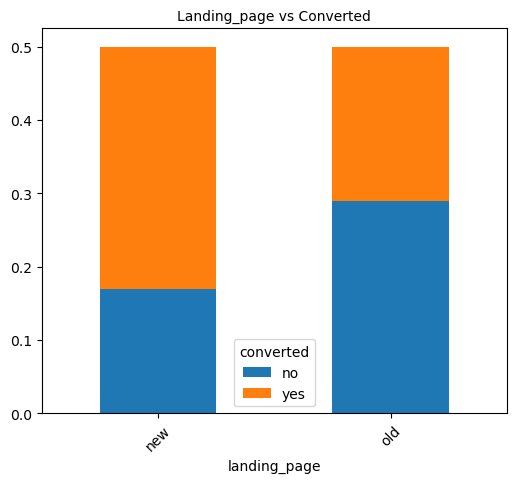

In [337]:
# to visualize the data between two cateogrical set : Stacked bar graph 

pd.crosstab(df['landing_page'], df['converted'], normalize = True ).plot(kind="bar", figsize=(6, 5), stacked=True)
plt.title('Landing_page vs Converted', fontsize = 10)
plt.xticks(rotation=45);


Observation:
    
1. Out of 50 users landed on the new page 33 converted into subscribers, and chances of the user will convert into subscriber is 66%.
2. Out of 50 users landed on old page 21 converted into subscribers, and chances of user will be converted to subscriber is 42%.

Inference:

We can infer that the conversion rate to subscription for the new page is greater than the old page. Is this difference significant enough to conclude that subscription status will increase with a new page?


### Step 1: Define the null and alternate hypotheses

Let p1, p2 be the proportions of users who converted into subscriber

p1 = Proportion of converted subscriber from old page

p2 = Proportion of converted subscriber from new page

Null Hypothesis:

$H_0:$  p2 ≤ p1

Alternate Hypothesis:

$H_a:$  p2 > p1

### Step 2: Select Appropriate test

#### Appropiate Test

This is a one-tailed test regarding two population proportions from two independent populations and therefore Two Proportion Z-test can be used.

#### Assumptions

1. Binomial distribution: Either users get converted to subscribers or otherwise they do not. 
2. Independent populations: As old and new pages are assigned to two different treatment and control groups, the two samples are from two independent populations.
3. Random selection: Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups.
4. The sample size of all the proportions in the contingency table are greater than 10. 

As all assumptions are met Two Proportion Z-test can be used.


### Step 3: Decide the significance level

As this one tail test, we select α = 0.05.

### Step 4: Collect and prepare data

In [339]:
# Total number of visits to new page 
New_page = 50

#Total number of visits to old page  
Old_page = 50

# calculate the number of converted users from the new and old page
Sub_new = df[df['landing_page'] == 'new']['converted'].value_counts()['yes']

Sub_old = df[df['landing_page'] == 'old']['converted'].value_counts()['yes']

Sub_new, Sub_old


(33, 21)

### Step 5: Calculate the p-value

In [341]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest([Sub_new, Sub_old] , [50, 50], alternative = 'larger' )

print('The p_value is '+ str(p_value))

The p_value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [342]:
# print the conclusion based on p-value

if p_value < 0.05:
    print(f'As the {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')
    

As the 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

At a 5% significance level, we rejected the null hypothesis. Hence, we do have enough statistical evidence to say that rate of users converted to subscriber for new page is higher than old page.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

In [344]:
# pandas crosstab() function is used to create a contingency table between two categorical variables
#Contingency Table of "language_preferred" and "converted"

pd.crosstab(df['language_preferred'], df['converted'], margins = True)

converted,no,yes,All
language_preferred,,,
English,11,21,32
French,19,15,34
Spanish,16,18,34
All,46,54,100


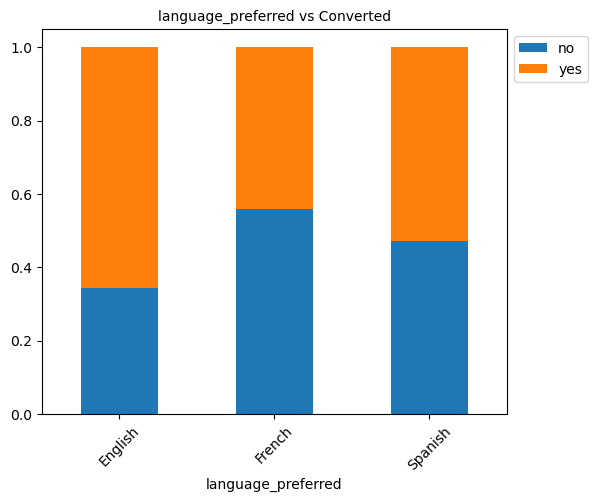

In [345]:
# to visualize the data between two cateogrical set : Stacked bar graph 

pd.crosstab(df['language_preferred'], df['converted'], normalize = 'index' ).plot(kind="bar", figsize=(6, 5), stacked=True)
plt.title('language_preferred vs Converted', fontsize = 10)
plt.legend(bbox_to_anchor=(1, 1)) #plot the legend outside the box
plt.xticks(rotation=45);


Observation:
    
1. Out of 32 users on english page 21 converted into subscribers, the chances of user converting into subscriber is 63%.
2. Out of 34 users on the french page only 15 converted into subscribers, the chances of user converting into subscriber is only 44%.
3. Out of 34 users on spanish page 18 converted into subscribers, the chances of user converting into subscriber is 52%.

Inference:

We can infer that the conversion rate of subscription does depend upon the language of the landing page. Is this difference significant enough to conclude that conversion and preferred language are interdependent?


### Step 1: Define the null and alternate hypotheses


$H_0:$ Conversion and preferred language are independent

$H_a:$ Conversion and preferred language are not independent


### Step 2: Select Appropriate test

#### Appropriate Test

This is a problem of the test of independence, concerning two categorical variables therefore Chi-Square Test for Independence can be used for this evaluation.


#### Assumptions

1. Both are categorical variables.
2. The number of observations for each level is greater than 5.
3. Random selection: Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups.

As all the assumptions are met, Chi-Square Test for Independence can be used for this evaluation.


### Step 3: Decide the significance level

For this problem statement, we select α = 0.05.


### Step 4: Collect and prepare data

In [346]:
#Contingency table for Chi-Square Test
Contin_Table = pd.crosstab(df['language_preferred'], df['converted'])
Contin_Table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [347]:
# complete the code to import the required function
from scipy.stats import chi2_contingency

# calculate the p-value through chi sqaure test
chi2, p_value, dof, exp_freq = chi2_contingency(Contin_Table)  

print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [348]:
# print the conclusion based on p-value

if p_value < 0.05:
    print(f'As the {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')
    

As the 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

At a 5% significance level, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the conversion and preferred language are independent of each other.


## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [350]:
#new dataframe with new landing page 
dfnew = df.loc[df['landing_page'] == 'new']
dfnew.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [352]:
dfnew.shape

(50, 6)

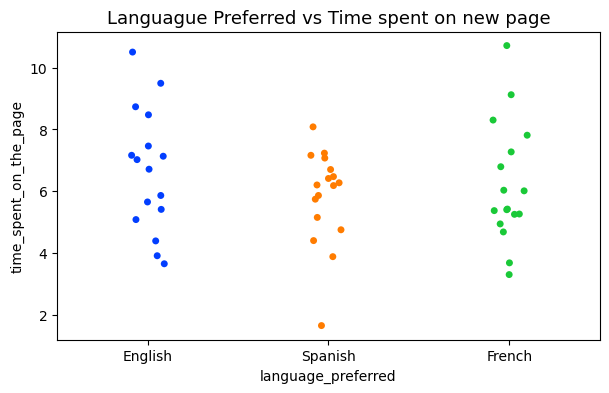

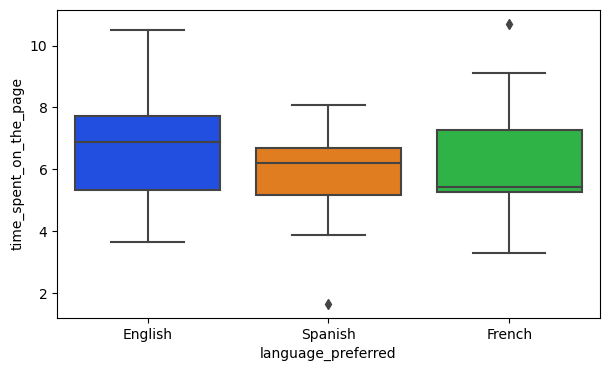

In [354]:
# Breaking the distribution of time wrt to new landing page
plt.figure(figsize = (7,4))
plt.title('Languague Preferred vs Time spent on new page', fontsize = 13)
sns.stripplot(data=dfnew, x='language_preferred', y= 'time_spent_on_the_page', palette = 'bright');
plt.show()
plt.figure(figsize= (7,4));
sns.boxplot(data=dfnew,x='language_preferred', y = 'time_spent_on_the_page', palette = 'bright');


In [355]:
dfnew.groupby(['language_preferred']).time_spent_on_the_page.min()

language_preferred
English    3.65
French     3.30
Spanish    1.65
Name: time_spent_on_the_page, dtype: float64

In [356]:
dfnew.groupby(['language_preferred']).time_spent_on_the_page.max()

language_preferred
English    10.50
French     10.71
Spanish     8.08
Name: time_spent_on_the_page, dtype: float64

In [357]:
dfnew.groupby(['language_preferred']).time_spent_on_the_page.mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

In [358]:
dfnew.groupby(['language_preferred']).time_spent_on_the_page.median()

language_preferred
English    6.865
French     5.420
Spanish    6.200
Name: time_spent_on_the_page, dtype: float64

Objective:
    
1. The data for the new french landing page is heavily right skewed with a median time of 5.42 mins lower than the mean of 6.19 mins.
2. The data for new english and spanish landing pages are left skewed.
3. There are outliers in spanish and french webpage distributions.
4. The distribution of time spent on spanish webpage is from 3.9 mins to 8 mins.
5. The mean and median time spent on english webpage is 6.66 mins and 6.86 mins.
6. The mean time spent on the Spanish landing page is 5.83 mins lower than the median of 6.2 mins. 
7. The minimum time spent on an english page is 3.65 mins and 50% of users have spent more than 6.8 mins on the webpage.
8. The maximum time spent on a spanish page is 8.08 mins and 75% of users have spent less than 6.5 mins on webpage.
9. The median time spent on a french page is 5.42 mins, quite low compared to other 2 languages.

Inference
We can infer that time spent on the new page varies according to the language of the webpage. If the difference is significant enough to conclude that language preference has an impact on the time spent on the webpage.


### Step 1: Define the null and alternate hypotheses

Let μ1, μ2, μ3 be the mean time spent for different languague new page

𝜇1 = Mean time spent on French page

𝜇2 = Mean time spent on English page

𝜇3 = Mean time spent on Spanish page

Null Hypothesis:

$H_0:$ 
 𝜇1 = 𝜇2 = 𝜇3

Alternate Hypothesis:

$H_a:$ 
 Atleast one of the mean time is different

### Step 2: Select Appropriate test

The problem consists of three population means therefore one way Anova can be used.

#### Assumptions

1. As proven above the data is independent and randomly selected.
2. The normality and equality of variance assumptions need to be checked.
3. For testing of normality, Shapiro-Wilk’s test is applied to the response variable.
4. For equality of variance, Levene test is applied to the response variable.

### Step 3: Prepare data with normality and variance test

#### Shapiro-Wilk’s test

Null Hypothesis:

$H_0:$ 
Time_spent follows a normal distribution 

Alternate Hypothesis:

$H_a:$ 
Time_spent does not follows the  normal distribution

In [359]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643193125724792


Observation:

The p-value of the test is .56, we fail to reject the null hypothesis that time_spent follows the normal distribution.

#### Levene test

Null Hypothesis:

$H_0:$ 
All the population variances are equal

Alternate Hypothesis:

$H_a:$ 
Atleast one variance is different from rest

In [370]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( dfnew.loc[dfnew['language_preferred'] == 'English','time_spent_on_the_page'], 
                                   dfnew.loc[dfnew['language_preferred'] == 'Spanish','time_spent_on_the_page'], 
                                   dfnew.loc[dfnew['language_preferred'] == 'French','time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Obeservation:

The p-value is .467 quite large, and therefore we fail to reject the null hypothesis of homogeneity of variances.

### Step 4: Decide the significance level

 we select α = 0.05.


### Step 5: Calculate the p-value

In [371]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(dfnew[dfnew['language_preferred'] == 'English']['time_spent_on_the_page'],
                                    dfnew[dfnew['language_preferred'] == 'Spanish']['time_spent_on_the_page'],
                             dfnew[dfnew['language_preferred'] == 'French']['time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [364]:
# print the conclusion based on p-value

if p_value < 0.05:
    print(f'As the {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')
    

As the 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

At a 5% significance level, we fail to reject the null hypothesis. Therefore, null hyopthesis is true and mean time spent on the new page is same for the different language users.

## Conclusion and Business Recommendations

#### Conclusions

--------------------------------------------------------------------------------------------------------------------------


1. The experiment is conducted by selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group).
2. The time spent on a website ranges from .19 mins to 10.71 mins with 25% of users having spent more than 7.022 mins on it. 
3. The maximum number of users, at least 17, have spent around 6 mins on the webpage.
4. The mean time spent on a new page is 6.22 mins, quite higher than 4.5 mins of the old page. It clearly shows average users are spending higher time on the new page as compared to the old landing page.
5. Atleast 75% of users landing on a new webpage have spent 5 mins more on it.
6. Apart from outliers, the minimum time spent on a new page is around 3 mins, significantly higher than .19 mins for the old page.
7. Total number of users that get converted to a subscriber of the news portal is 54. The difference in users that converted to subscribers is only slightly higher (8 users) than non-subscriber. 
8. Higher time spent (atleast 5 mins ) on a page can significantly increase the chances of subscription of the user.
9. There is a higher conversion rate to subscription for the new page as compared to the old page. 
10. The landing webpage in languages Spanish or French are visited a little more (34 times) than english (32 times).
11. The time spent on english or french pages is widely distributed from .19 mins to 10.7 mins.


Conclusions from Univariate and bivariate analysis but failed to prove statistically:
1. We can conclude that the conversion rate of subscription depends upon preferred language. There are high chances that English users will be converted into subscribers as compared to other 2 languages.
2. The conversion of french page users into a subscriber is comparatively low as compared to spanish or english pages.
3. The portal should focus more on news designed to target English and Spanish users, as there are high chances of them subscribing for the service.
4. The minimum time spent on an english page is 3.65 mins and 50% of users have spent more than 6.8 mins on the webpage.
5. The maximum time spent on a spanish page is 8.08 mins and 75% of users have spent less than 6.5 mins on webpage.
6. Most users who prefer spanish pages usually stay on websites from 3.5 to 7.5 mins only and probably less interested in news portals or have low attention span as compared to english or french users.








#### Business Recommedations

----------------------------------------------------------------------------------------------------------------------------

1. We do have enough statistical evidence to say that the average time spent on a new page is significantly higher than the old page. More than 75% of users have spent atleast 5 mins on a new webpage. Therefore the new webpage is performing better in terms of "engagement" in comparison with the old page.

2. As more time spent (atleast 5 mins) on a page can increase the chances of subscription from the respective user. Atleast More 75% of users have spent more than 5 mins on the  new webpage.

3. We do have enough statistical evidence to say that rate of users converted to subscriber for new page is higher than old page. As more people are subscribing to the service after landing on the new page, it is performing better in terms of "conversion rate" as compared to the old page.

4. With bivariate analysis we concluded chances of English users being converted into subscribers are much more than that of french users. But, statistical hypothesis testing failed to prove it for this data set. Therefore we do not have enough evidence to conclude that the conversion rate of subscription depends on the language of the webpage. 

5. Similarly, we failed to prove (through hypothesis testing), that mean time spent on the new page varies according to the language of the webpage. As the data set for this study is quite small with 50 samples only, this hypothesis needs further investigation with a larger data set. More research is required and larger data sets need to be analyzed for time spent on different languages webpages for better conclusive results. 


___